In [31]:
!wget https://raw.githubusercontent.com/claytonjwong/Algorithms-DNA-Sequencing/refs/heads/master/1_week/ERR037900_1.first1000.fastq

--2025-10-05 19:17:19--  https://raw.githubusercontent.com/claytonjwong/Algorithms-DNA-Sequencing/refs/heads/master/1_week/ERR037900_1.first1000.fastq
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 
200 OKequest sent, awaiting response... 
Length: 241626 (236K) [text/plain]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.04s   

2025-10-05 19:17:19 (5.57 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [32]:
def readFastq(filename):
    sequences = [] 
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() #first line contains metadata
            seq = fh.readline().rstrip() #second line contains the reads
            fh.readline() #third line is just "+"
            qual = fh.readline().strip() #fourth line contains quality score
            if len(seq) == 0:
                break 
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, qual = readFastq('ERR037900_1.first1000.fastq')

In [36]:
#first 5 reads
seqs[:5]

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']

In [37]:
# first 5 quality scores
qual[:5]

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################',
 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########']

In [39]:
#convert ASSCI symbol to quality score
def phread33ToQ(qual): 
    #function ord will take the ASSCI value to a number
    return ord(qual) - 33

In [45]:
#lets check what's the quality score of "#"
phread33ToQ('#')

2

In [46]:
def createHist(qualities):
    #keep track of frequency of each qality score
    hist = [0] * 50 #50 is the highest score 
    for qual in qualities:
        for phred in qual:
            q = phread33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(qual)
print(h)
    

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


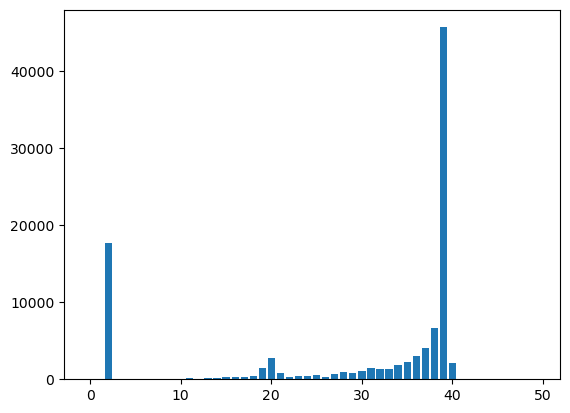

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.show()